# Bussiness Goal

The main goal is to predict rent (count feature) using the given parameters. The management department will use the results to understand how the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and customer expectations. 

I specifically answer which factors contribute most to the number of bicycles checked out over a given day. To answer this question, I build and train a Regression Model on the Capital Bike Share (Washington, D.C.) Kaggle dataset.

## 1. Import the required libraries and packages

In [1]:
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## 2. Reading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 2.1. Understanding the dataset

#### Time Series

- datetime-hourly date +timestamp


#### Categorical

- Season: 
 - 1 (Spring)
 - 2 (Summer)
 - 3 (Fall)
 - 4 (Winter)
- Holiday
- Workingday
- Weather: 
 - 1 (Clear)
 - 2 (Mist)
 - 3 (Light snow)
 - 4 (Heavy rain)

 
#### Numeric

- temp: in Celsius

- atemp: absolute temp "feels Like"

- humidity: relative humidity

- windspeed: wind speed

- casual: number of non-registered user

- registered: number of registered user

#### Target

- count: number of total rental (casual and registered) 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 3. EDA

I perform the following steps:
- Generate boxplot and histogram for the **count** column
- Visualize the distributions of the numerical features 
- Visualize the categorical columns w.r.t. the **count** column
- Analyze the correlation between all the columns

### 3.1. Boxplot  and histogram of the count column

According to the following Boxplot and Histogram, most of the rental count data lie between 30 and 300, and many outliers are present in the dataset. In addition, the histogram shows that the data is skewed to the left (negative), indicating the dataset's non-uniform distribution, where the values' density is between 0 and 200.

<AxesSubplot: xlabel='count', ylabel='Count'>

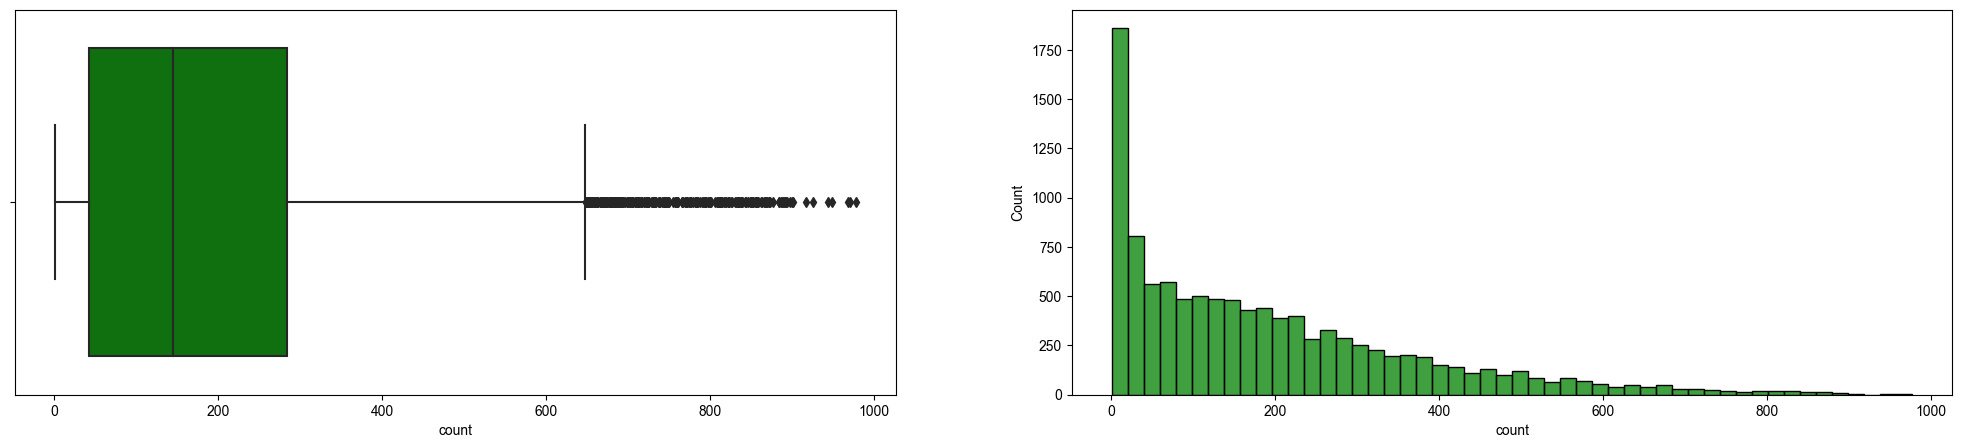

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(25,5)

# Boxplot
sns.boxplot(x='count',data=df,color='g',ax=ax[0])

# Histogram
sns.set_style('whitegrid')
sns.histplot(df['count'],bins=50,color='g',ec='black',ax=ax[1])

### 3.2. Visualize the distributions of the count vs. the numerical features

The following diagrams show the distribution of the "count" vs. the numerical features, including "temp", "atemp", "humidity", "windspeed", "casual", and "registered" (diagonal), as well as the correlations between them. As can be seen, the distribution of "temp", "atemp", and "humidity" are close to a normal distribution, while those of the "windspeed", "casual", and "registered" are skewed. Moreover, the distributions of "temp" and "atemp" are very similar and highly correlated. In addition, since the "count" is the sum of "casual" and "registered", they're inversely correlated. We can remove one of the correlated features to make the dataset smaller and avoid multicollinearity.

<Figure size 1200x1200 with 0 Axes>

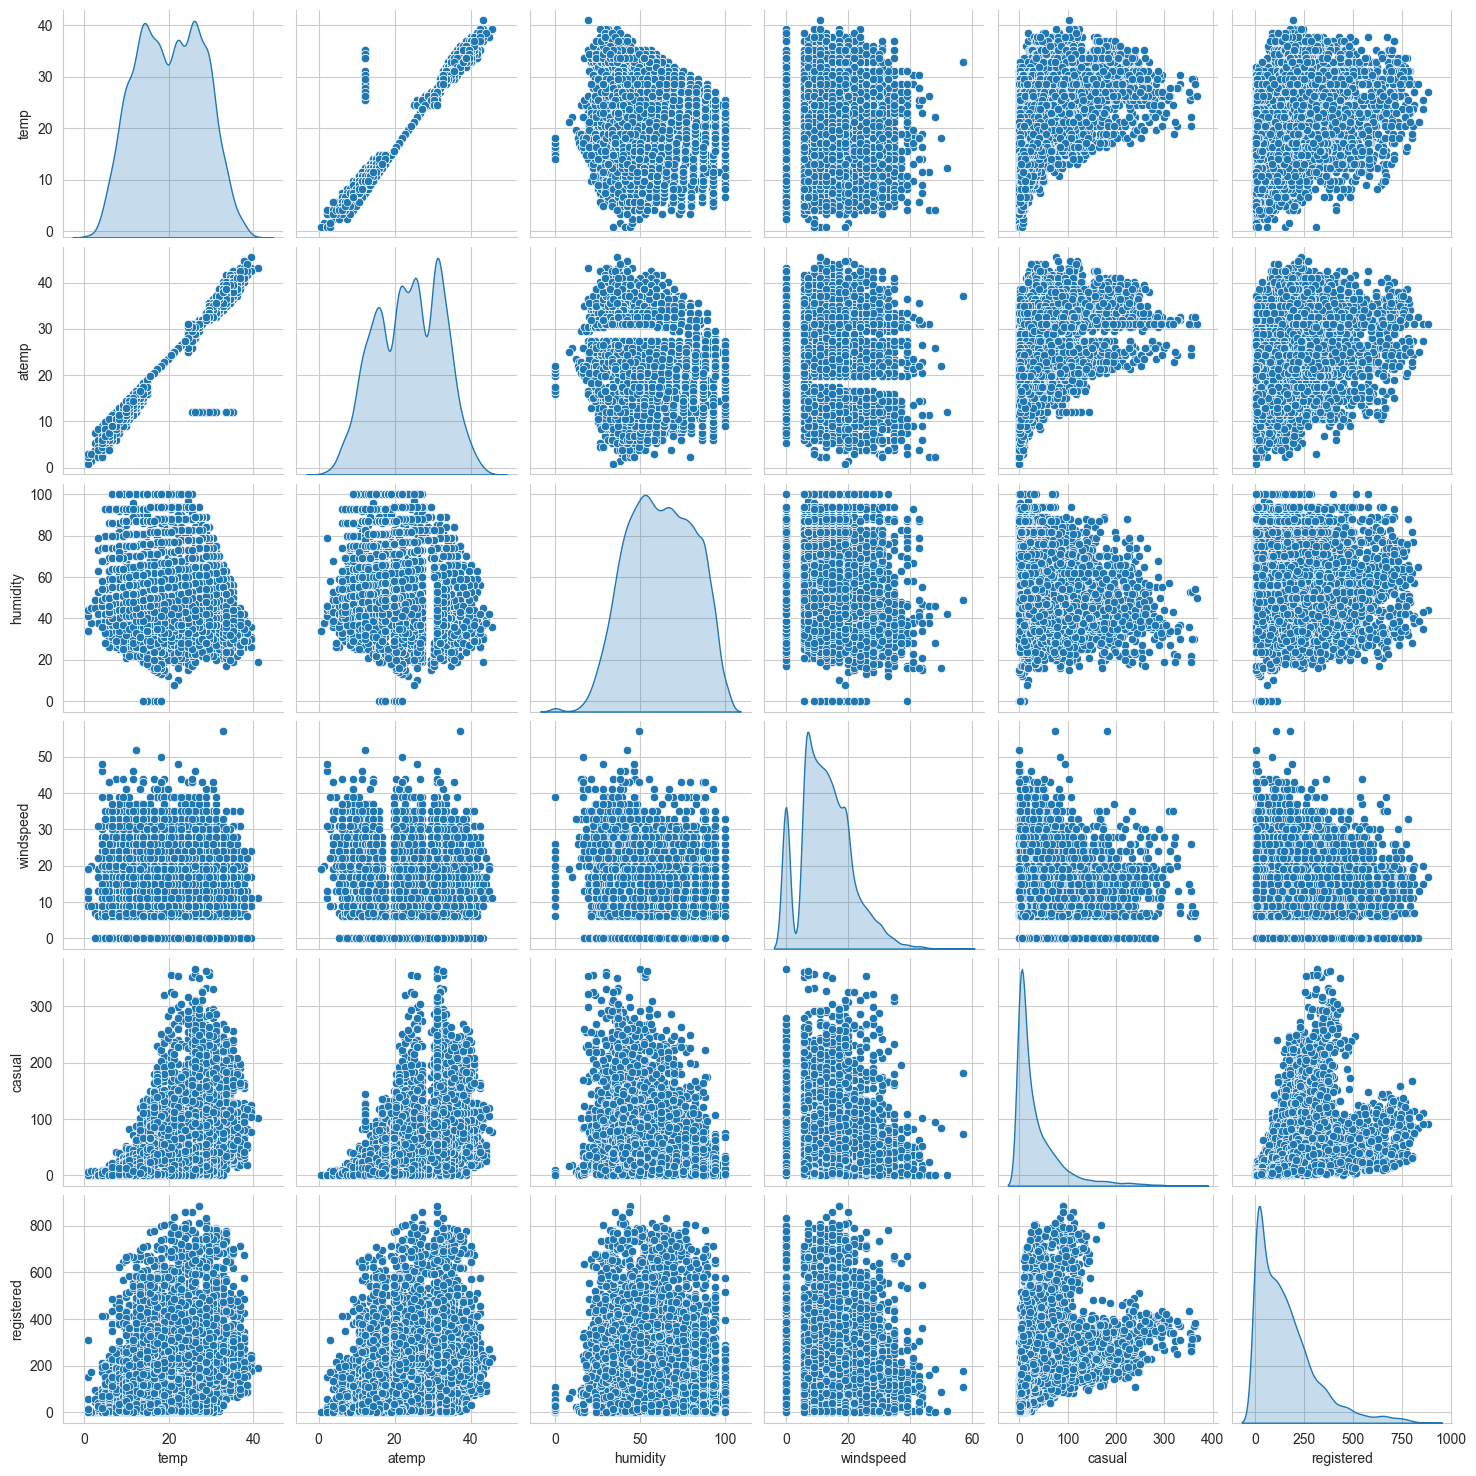

In [6]:
#pairlot to have an overview of relationship between numerical columns

df_1=df[['temp','atemp','humidity','windspeed','casual','registered']]
plt.figure(figsize=(12,12))
sns.pairplot(df_1, diag_kind='kde')

### 3.3. Categorical columns w.r.t. the count column

#### 3.3.1. Converting the datetime feature
The feature "datetime" is an object (string). For any further processing, it should be converted to the datetime format and split into its components, including "hour", "day", "month", "dayofweek", and "year".

In [7]:
df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [8]:
# Pandas to_datetime() function converts string Date time into Python Date time object.
df['datetime']=pd.to_datetime(df['datetime'])
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [9]:
# Split and convert the date and time information into numerical values and add them to the dataframe as new columns.
df['hour']=df['datetime'].dt.hour
df['day']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['dayofweek']=df['datetime'].dt.dayofweek
df['year']=df['datetime'].dt.year
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,dayofweek,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1,5,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,5,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1,5,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1,5,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1,5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,19,12,2,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,19,12,2,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,19,12,2,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,19,12,2,2012


In [10]:
df=df.drop(['datetime'],axis=1)

#### 3.3.2. Visualize the relationships between count and the categorical features

The following diagrams present the relationships between the "count" and the "year", "month", "workingday", "season", "weather", and "holiday" features, as well as the "hour" for the "dayofweek", "weather", and "season" features. According to the plots:

- The number of rentals was much more in 2012 compared to 2011. 
- The number of rentals from May to October is much larger than the rest of the year. 
- There is no relationship between (non-)working days and the number of rentals. We can also see a more significant number of outliers in the working days.
- Autumn has the most significant number of rentals, and then summer. 
- Renting is most and least popular in the clear and snowy weather, respectively, as expected (1: Clear 2: Mist 3: Light Snow  4: Heavy Rain).
- On holidays, the number of rentals is a bit larger than the other days, and the variation is more significant on regular days.
- The most significant demand for bike rental is during rush hours (morning and afternoon) during working days, whereas on weekends, the order between 11:00 and 17:00 is high and then reduces smoothly. A suggestion could be to have a separate categorical column for bike rental during rush hours.
- The bike-rental demand pattern is similar for different weather conditions and seasons.

<AxesSubplot: xlabel='hour', ylabel='count'>

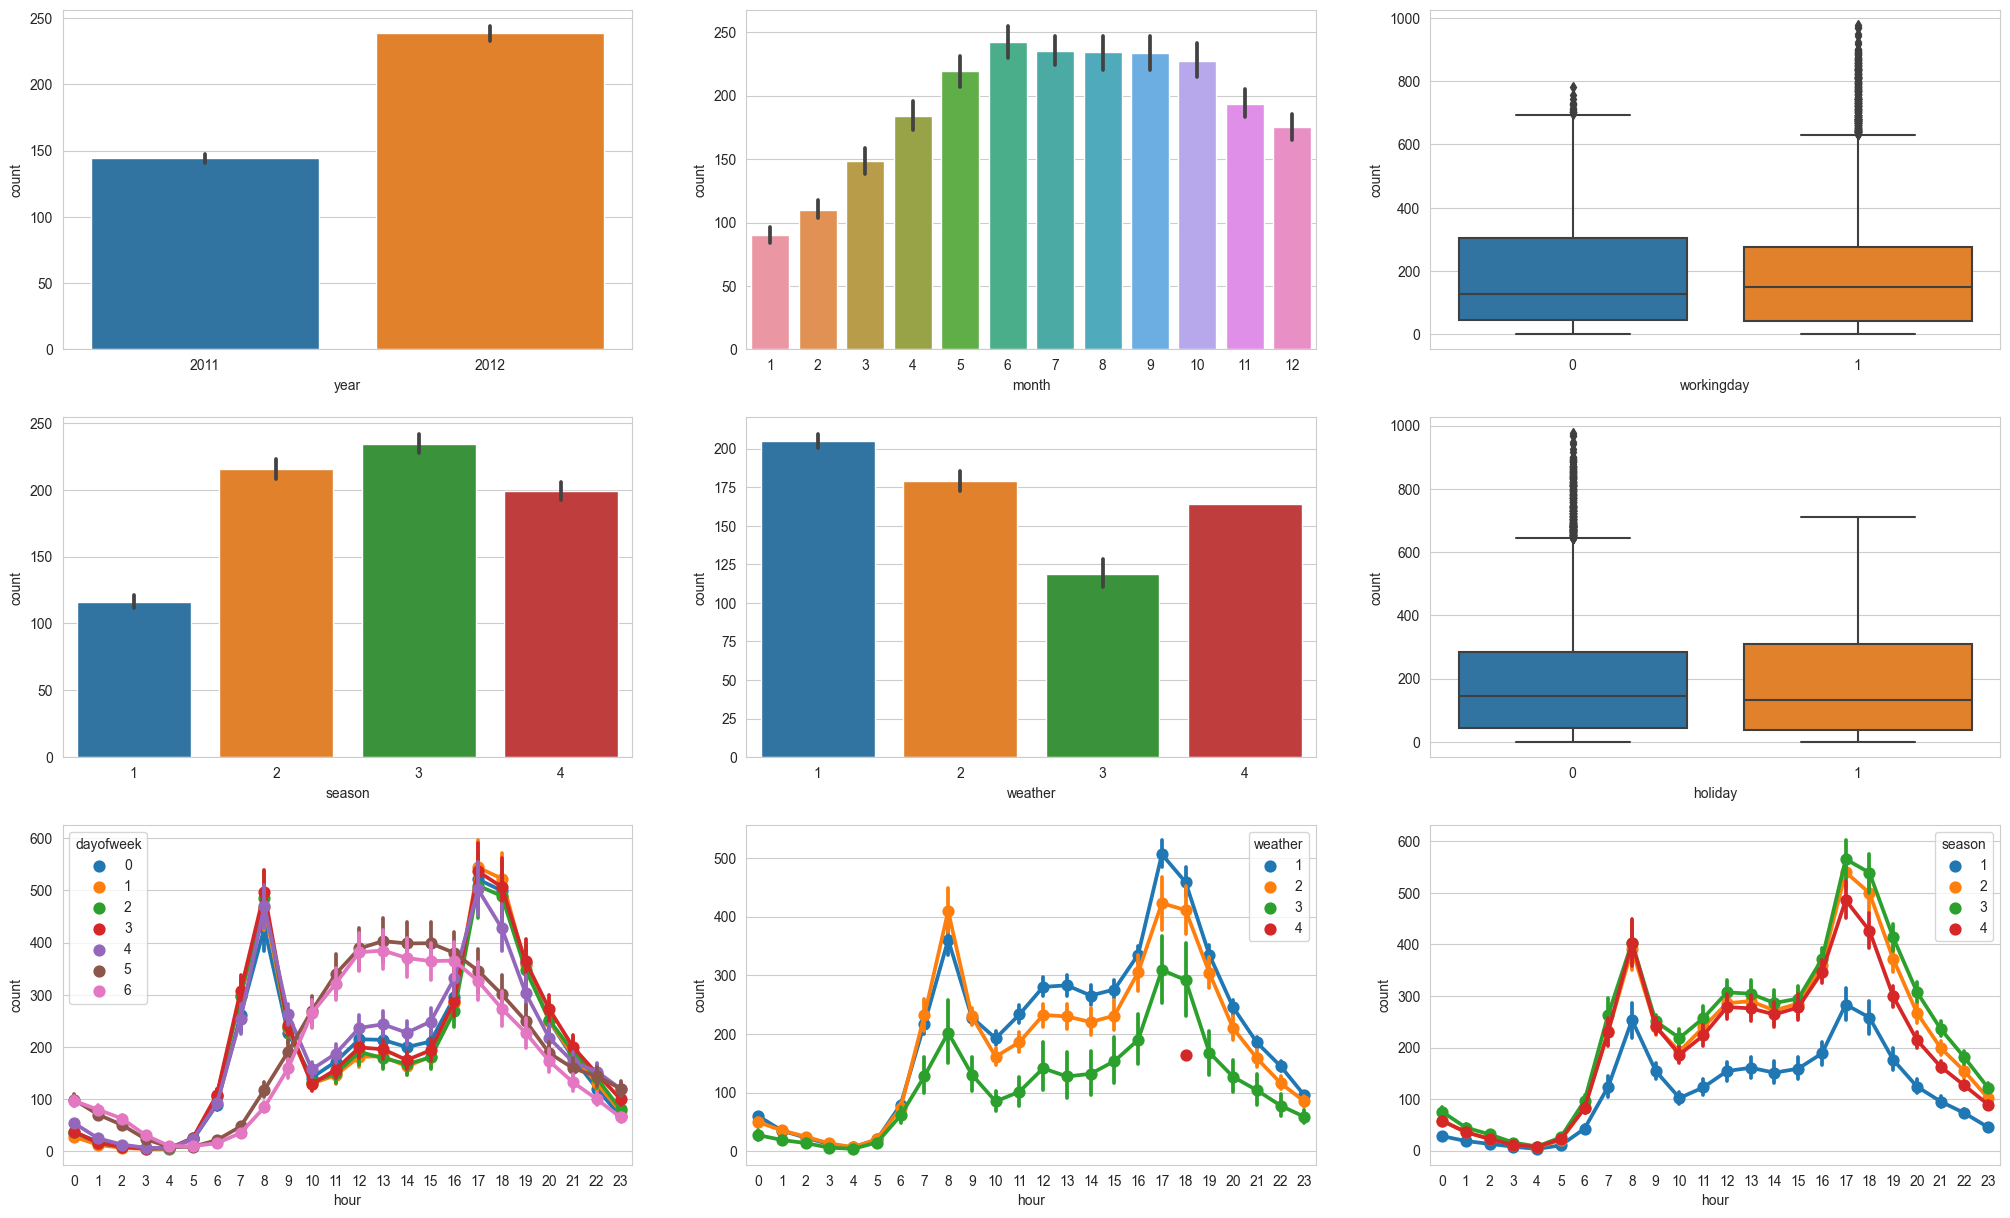

In [11]:
# Visualize the relationship between count & each categorical features (barplot,point plot)
fig, ax = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(25,15)

sns.barplot(x='year',y='count',data=df,ax=ax[0][0])  #continus value-> barplot
sns.barplot(x='month',y='count',data=df,ax=ax[0][1]) #continus value-> barplot
sns.boxplot(x='workingday',y='count', data=df,ax=ax[0][2])
sns.barplot(x='season',y='count',data=df,ax=ax[1][0])
sns.barplot(x='weather',y='count',data=df, ax=ax[1][1])
sns.boxplot(x='holiday',y='count', data=df, ax=ax[1][2])

sns.pointplot(x='hour', y='count', data=df, hue='dayofweek', ax=ax[2][0])
sns.pointplot(x='hour', y='count', data=df, hue='weather', ax=ax[2][1])
sns.pointplot(x='hour', y='count', data=df, hue='season', ax=ax[2][2])


### 3.4. Correlations between all features

The following heatmap illustrates the correlations between all features. It shows that "temp" with "atemp" and "count" with "registered" and "casual" are highly correlated, as we have seen in our previous analysis. Therefore, we can drop one of them. I think it's worth mentioning that these features have no logical correlation; they only have numerical correlations.

<AxesSubplot: >

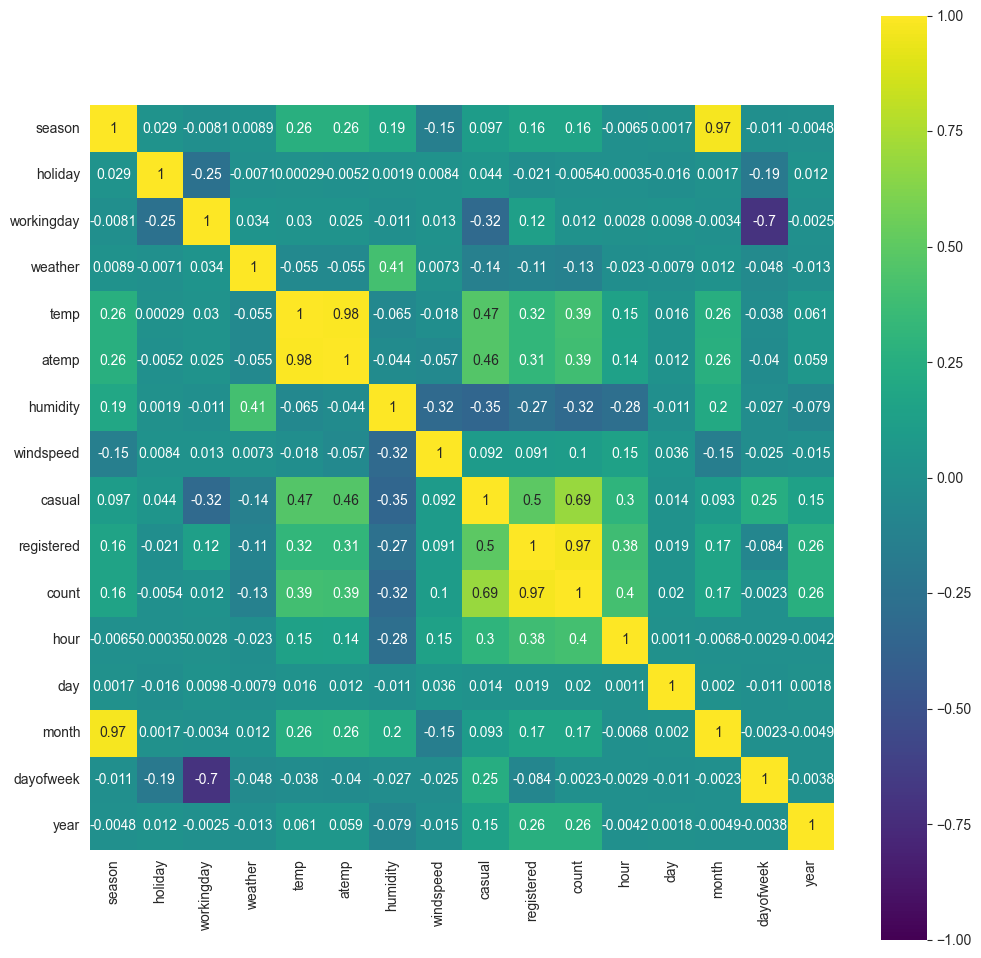

In [12]:
plt.figure(figsize=(12,12))
#correlation
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='viridis',annot=True,square=True) #cmap-> color map what color scheme you want to see

In [13]:
# Drop the correlated columns.
df=df.drop(['casual','registered','atemp'],axis=1)

I preprocess the data by:

- taking the Log for the "count" column to remove the skewness of the data,
- eliminating the outliers,
- performing MinMax scaling on the numerical columns to bring them into the same scale for increasing the model learning accuracy,
- converting the categorical features to dummy variables.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   count       10886 non-null  int64  
 8   hour        10886 non-null  int64  
 9   day         10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  dayofweek   10886 non-null  int64  
 12  year        10886 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.1 MB


### 4.1. Taking the Log for the count column
I calculate the natural logarithmic value for the "count" column to remove the skewness of the data. In the following figure, the left plot represents the original data skewed to the left, and the right plot demonstrates the data distribution after taking the Log, which looks closer to normal distribution.


<AxesSubplot: xlabel='count', ylabel='Count'>

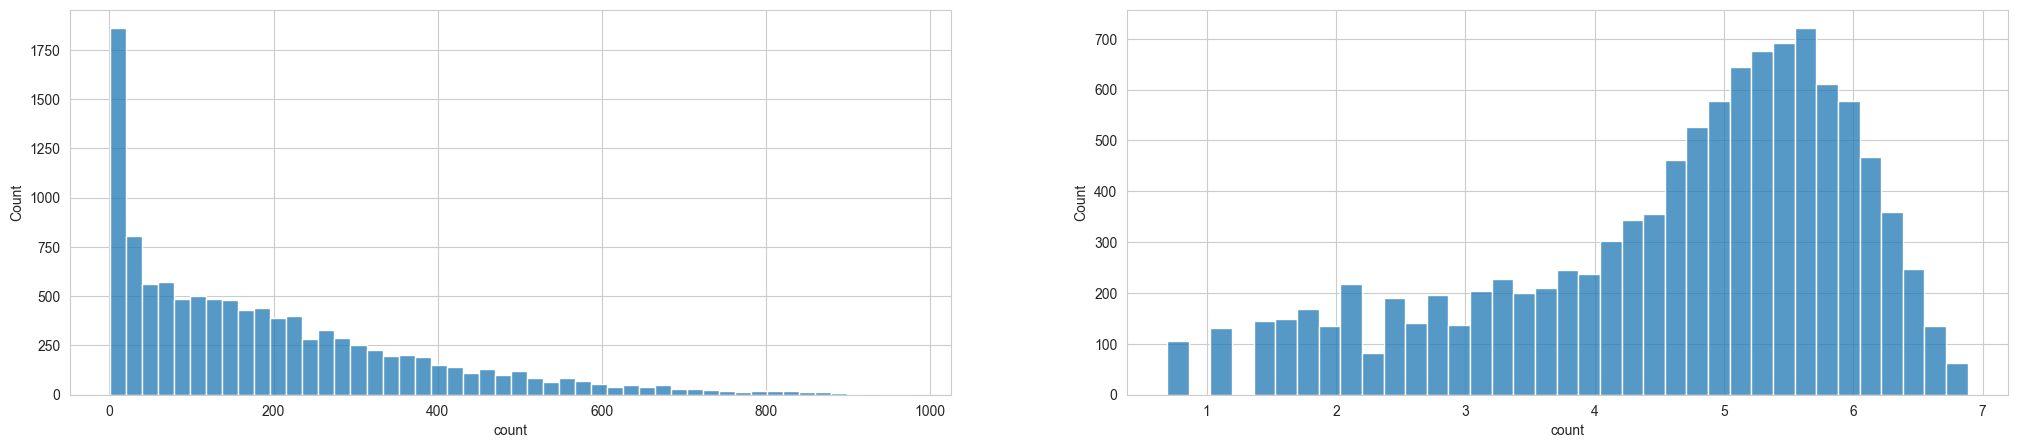

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(25,5)

# the count column
sns.histplot(df['count'],bins=50, ax=ax[0])

# Take the log for count column 
df['count']=np.log1p(df['count'])
sns.histplot(df['count'], ax=ax[1])

### 4.2. Eliminating the outliers

For outlier elimination, I remove the points with residuals smaller than 3std (99.7% of the data lie in 3std). According to the boxplot, all the outliers except one are removed. We can ignore the remaining.

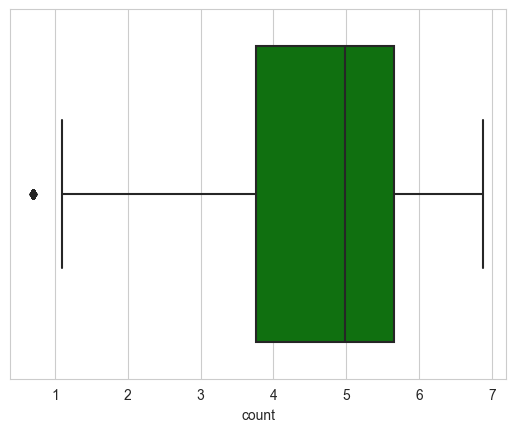

In [16]:
#calculate the residual of abs value of each feature(count) - mean --> residual values
#those values who lies between or less than 3* std

df = df[np.abs(df['count'])-df['count'].mean() <= (3*df['count'].std())]

#Boxplot of count
sns.boxplot(x='count',data=df,color='g')
plt.show()

### 4.3. Performing MinMax scaling on the numerical columns

I scale the numerical features to a particular range using the MinMax scaler from sklearn to bring them into the same scale for increasing the model learning accuracy.

In [17]:
#create a function which take the numeric values and scale it to desire values into Max and Min

def scaling(df): #df as a parameters
    
    scaler=MinMaxScaler()
    
    num_cols=['temp','humidity','windspeed'] #specify the remaining numerical columns
    
    df[num_cols]=scaler.fit_transform(df[num_cols]) 
    
    return df

In [18]:
df=scaling(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  float64
 6   windspeed   10886 non-null  float64
 7   count       10886 non-null  float64
 8   hour        10886 non-null  int64  
 9   day         10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  dayofweek   10886 non-null  int64  
 12  year        10886 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.2 MB


### 4.4. Converting the categorical features to dummy variables

I use the "dummy" functino from Pandas for converting the categorical feature to dummy variables to be fed into the ML model.

In [19]:
dummy = pd.get_dummies(df[['season','weather','hour', 'day','month','dayofweek','year']])
dummy

,season,weather,hour,day,month,dayofweek,year
0,1,1,0,1,1,5,2011
1,1,1,1,1,1,5,2011
2,1,1,2,1,1,5,2011
3,1,1,3,1,1,5,2011
4,1,1,4,1,1,5,2011
...,...,...,...,...,...,...,...
10881,4,1,19,19,12,2,2012
10882,4,1,20,19,12,2,2012
10883,4,1,21,19,12,2,2012
10884,4,1,22,19,12,2,2012


In [20]:
# drop them from the main dataframe
df.drop(['season','weather','hour', 'day','month','dayofweek','year'], axis = 1, inplace = True)

In [21]:
#concat the two dataframe
df = pd.concat([df,dummy], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     10886 non-null  int64  
 1   workingday  10886 non-null  int64  
 2   temp        10886 non-null  float64
 3   humidity    10886 non-null  float64
 4   windspeed   10886 non-null  float64
 5   count       10886 non-null  float64
 6   season      10886 non-null  int64  
 7   weather     10886 non-null  int64  
 8   hour        10886 non-null  int64  
 9   day         10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  dayofweek   10886 non-null  int64  
 12  year        10886 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.2 MB


## 6. Define the observed and target variables
I take the "count" column as the target variable (y) and the other features as the observed variables (X).

In [22]:
X=df.drop(['count'],axis=1)
y=df['count']

In [23]:
X

,holiday,workingday,temp,humidity,windspeed,season,weather,hour,day,month,dayofweek,year
0,0,0,0.224490,0.81,0.000000,1,1,0,1,1,5,2011
1,0,0,0.204082,0.80,0.000000,1,1,1,1,1,5,2011
2,0,0,0.204082,0.80,0.000000,1,1,2,1,1,5,2011
3,0,0,0.224490,0.75,0.000000,1,1,3,1,1,5,2011
4,0,0,0.224490,0.75,0.000000,1,1,4,1,1,5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,0.367347,0.50,0.456213,4,1,19,19,12,2,2012
10882,0,1,0.346939,0.57,0.263195,4,1,20,19,12,2,2012
10883,0,1,0.326531,0.61,0.263195,4,1,21,19,12,2,2012
10884,0,1,0.326531,0.61,0.105325,4,1,22,19,12,2,2012


In [24]:
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10886, dtype: float64

## 7. Split to train and test sets

I randomly take 70% of the data for training set and the rest for the test set.


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## 8. Linear Regression

### 8.1. Training

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

### 8.2. Prediction and evaluation

In [28]:
#Intercept --> b0
print(lr.intercept_)

-826.215743342633


In [29]:
# Coefficient -> slope
print(lr.coef_)

[ 7.46530913e-02  2.18092463e-02  1.84820832e+00 -1.46776026e+00
  1.72134088e-01 -6.29713545e-02  2.14166870e-02  9.86514711e-02
  1.37025713e-03  8.12574021e-02  2.85791464e-02  4.12193494e-01]


In [30]:
#convert to dataframe to see all the features and their coefficient beside
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
holiday,0.074653
workingday,0.021809
temp,1.848208
humidity,-1.467760
windspeed,0.172134
season,-0.062971
weather,0.021417
hour,0.098651
day,0.001370
month,0.081257


In [31]:
predictions = lr.predict(X_test)

In [32]:
print('MAE: %.3f' % (metrics.mean_absolute_error(y_test, predictions)))
print('RMSE: %.3f' % (np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('R2 score: %.3f' % (r2_score(y_test, predictions)))

MAE: 0.795
RMSE: 1.011
R2 score: 0.488


Text(0, 0.5, 'predictions')

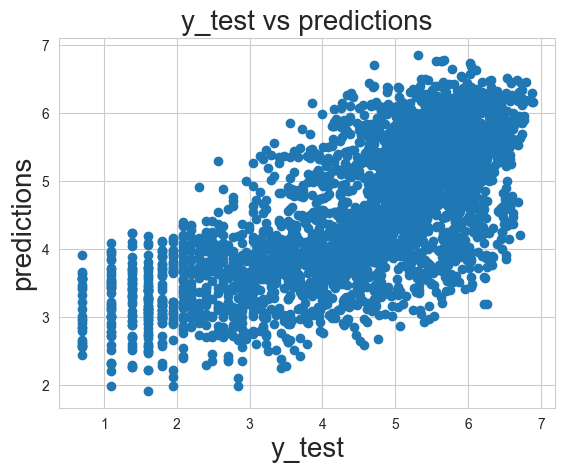

In [33]:
#plotting y_test and y-pred to understand the spread
fig=plt.figure()
plt.scatter(y_test,predictions)

plt.title('y_test vs predictions',fontsize=20)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('predictions',fontsize=20)

I generate a scatter plot to better analyze the predictions (y_pred) w.r.t the ground truth (y_test). This plot demonstrates that that there are several stripes look like clusters for the smaller rental counts (the scale is logarithmic), indicating missing information in our model. I can hypothesize that:
- there could be some feature that these clustered points have in common,
- there could be a feature discriminating these points that is not present in the dataset, or our linear regression model is not able to learn it,
- It could also be related to the smaller number of samples in this range according to the data histogram (presented before),
- it could also be related to the data collection approach.

Here are the quantiative results of the trained on the test set:
- MAE: 0.795
- RMSE: 1.011
- R2 score: 0.488

R2 score determines the proportion of variance in the dependent variable that the independent variable can explain. In other words, the R2 score shows how well the regression model fits the data. According to the result, the R2 score for my trained model is 0.488, which indicates the model's weakness in explaining the data and consequently performing predictions.

## 9. Conclusion
According to EDA:
- No specific pattern was observed between a particular day and the number of renting.
- On working days, there is a significant rental demand during rush hours.
- Regarding the weather, as expected, rainy day has the lowest rent, and the number of renters increased in clear weather.
- Fall has the highest rate of ranting esp between 17-18. The high season is from May until October.
- There are some correlations between a few features, including atemp and temp, as well as casual and registered. I removed one of the correlated features.

Due to the skewed data distribution, I used the Log value of the target instead of its original value, which could increase the performance by 10% (from 0.39 to 0.49).

Finally, considering the poor R2 score of the trained model, Liner regression is not able to explain the existing non-linearities in the dataset. 

Therefore, as a next step, one can further investigate the model in detail by computing the residuals and p-values for different features or using other machine learning approaches. 